In [1]:
import pandas as pd
import numpy as np


In [2]:
import requests

In [3]:
 city='hanoi'
 r= requests.request("POST",f"http://127.0.0.1:9999/get_weather/{city}" )

In [4]:
import json
df=json.loads(r.content)

In [5]:
df

{'ID': 1581130.0,
 'ap_suat': [1009.0,
  1010.0,
  1010.0,
  1010.0,
  1009.0,
  1009.0,
  1008.0,
  1007.0,
  1007.0,
  1007.0,
  1008.0,
  1009.0],
 'do_am': [90.0,
  86.0,
  81.0,
  77.0,
  73.0,
  69.0,
  71.0,
  69.0,
  74.0,
  80.0,
  88.0,
  91.0],
 'huong_gio': [142.0,
  143.0,
  145.0,
  151.0,
  155.0,
  159.0,
  149.0,
  140.0,
  126.0,
  95.0,
  41.0,
  41.0],
 'kinh_do': 105.8412,
 'nhiet_do': [23.0,
  22.0,
  23.0,
  22.0,
  23.0,
  24.0,
  24.0,
  25.0,
  25.0,
  25.0,
  25.0,
  23.0],
 'quoc_gia': 'VN',
 'ten': 'hanoi',
 'thoi_gian': ['Sat Apr 16 07:01:01 2022',
  'Sat Apr 16 08:01:01 2022',
  'Sat Apr 16 09:01:01 2022',
  'Sat Apr 16 10:01:01 2022',
  'Sat Apr 16 11:01:02 2022',
  'Sat Apr 16 12:01:01 2022',
  'Sat Apr 16 13:01:02 2022',
  'Sat Apr 16 14:01:01 2022',
  'Sat Apr 16 15:01:01 2022',
  'Sat Apr 16 16:01:01 2022',
  'Sat Apr 16 17:01:02 2022',
  'Sat Apr 16 18:01:01 2022'],
 'toc_do_gio': ['4.33',
  '5.01',
  '5.02',
  '5.13',
  '5.92',
  '6.56',
  '5.86',


In [6]:
import pandas as pd
data=pd.DataFrame(df,index=None)
data.thoi_gian= pd.to_datetime(data.thoi_gian)

In [7]:
df=data
list(df.nhiet_do)

[23.0, 22.0, 23.0, 22.0, 23.0, 24.0, 24.0, 25.0, 25.0, 25.0, 25.0, 23.0]

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

# from keras.models import load_model
# Xay dung model LSTM
model = Sequential()
model.add(LSTM(units = 50, return_sequences = True, input_shape = (12,1),activation='sigmoid'))
model.add(Dropout(0.3))
# model.add(LSTM(units = 50, return_sequences = True,activation='sigmoid'))
# model.add(Dropout(0.3))
# model.add(LSTM(units = 50, return_sequences = True))
# model.add(Dropout(0.3))
model.add(LSTM(units = 50,activation='sigmoid', ))
model.add(Dropout(0.2))
model.add(Dense(units = 1))

opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer = opt, loss = 'mean_squared_error')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 12, 50)            10400     
                                                                 
 dropout (Dropout)           (None, 12, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 30,651
Trainable params: 30,651
Non-trainable params: 0
_________________________________________________________________


In [9]:
model=keras.models.load_model('./weights/nhiet_do.h5')

In [10]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_21 (LSTM)              (None, 12, 50)            10400     
                                                                 
 dropout_7 (Dropout)         (None, 12, 50)            0         
                                                                 
 lstm_22 (LSTM)              (None, 50)                20200     
                                                                 
 dropout_8 (Dropout)         (None, 50)                0         
                                                                 
 dense_9 (Dense)             (None, 1)                 51        
                                                                 
Total params: 30,651
Trainable params: 30,651
Non-trainable params: 0
_________________________________________________________________


In [11]:
from collections import deque
X=deque(list(df.nhiet_do), maxlen=12)

In [50]:
from collections import deque
X=deque(list(df.nhiet_do), maxlen=12)
y=[]
for i in range(6):
    p=(model.predict(np.array([list(X)]))[0][0])
    y.append(float(int(p)))
    X.append(p)

In [51]:
y


[21.0, 20.0, 18.0, 17.0, 16.0, 15.0]

In [13]:
# X.appendleft(model.predict(np.array([list(X)])))

In [14]:
model.predict(np.array([list(X)]))

array([[21.740032]], dtype=float32)

In [15]:
model.input_shape

(None, 12, 1)

In [16]:
keras.__version__

'2.8.0'

In [17]:
import numpy as np
t=np.array([list(X),list(X)])
t.shape

(2, 12)

In [18]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_21 (LSTM)              (None, 12, 50)            10400     
                                                                 
 dropout_7 (Dropout)         (None, 12, 50)            0         
                                                                 
 lstm_22 (LSTM)              (None, 50)                20200     
                                                                 
 dropout_8 (Dropout)         (None, 50)                0         
                                                                 
 dense_9 (Dense)             (None, 1)                 51        
                                                                 
Total params: 30,651
Trainable params: 30,651
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.predict(t)

array([[21.740032],
       [21.740032]], dtype=float32)

In [20]:
t

array([[23., 22., 23., 22., 23., 24., 24., 25., 25., 25., 25., 23.],
       [23., 22., 23., 22., 23., 24., 24., 25., 25., 25., 25., 23.]])

In [24]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
regressor=keras.models.load_model("weights/nhiet_do.h5")
from collections import deque
X=deque([23.0, 22.0, 23.0, 22.0, 23.0, 24.0, 24.0, 25.0, 25.0, 25.0, 25.0, 23.0], maxlen=12)
X.append(int(regressor.predict(np.array([list(X)]))[0][0]))

In [25]:
X

deque([22.0, 23.0, 22.0, 23.0, 24.0, 24.0, 25.0, 25.0, 25.0, 25.0, 23.0, 21])

In [32]:
list(df.nhiet_do)min(.extend(y))

TypeError: 'NoneType' object is not iterable

[23.0, 22.0, 23.0, 22.0, 23.0, 24.0, 24.0, 25.0, 25.0, 25.0, 25.0, 23.0]
[21.0, 20.0, 18.0, 17.0, 16.0, 15.0]


(11.0, 29.0)

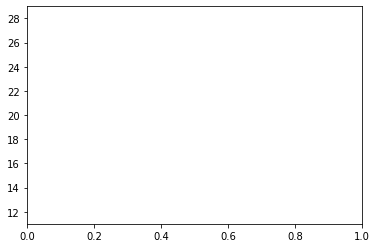

In [53]:
nhiet_do=list(df.nhiet_do)
print(nhiet_do)
print(y)
nhiet_do.extend(y)
plt.ylim(min(nhiet_do) - 4, max(nhiet_do) + 4)

In [38]:
y

[19, 17, 16, 15, 15, 14]

In [39]:
float(y)

TypeError: float() argument must be a string or a number, not 'list'